# Simplest AutoEncoder

Use a simple autoencoder to reduce dimensionality.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [22]:
data = make_blobs(n_samples=1000, 
                  n_features=3, 
                  centers=2, 
                  random_state=1251)

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

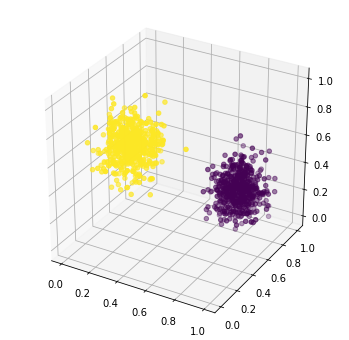

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
data_x = scaled_data[:,0] #col 1
data_y = scaled_data[:,1] #col 2
data_z = scaled_data[:,2] #col 3
ax.scatter(data_x, data_y, data_z, c=data[1]);

## Building an AutoEncoder

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

In [26]:
inputs = Input(3)
encoder = Dense(2)
decoder = Dense(3)

model = Sequential([inputs, encoder, decoder], name='autoencoder')

In [27]:
learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


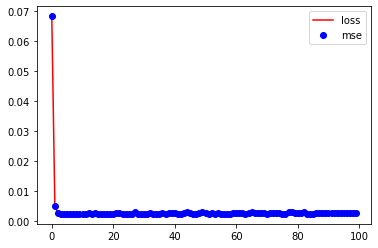

In [28]:
history = model.fit(x=scaled_data, y=scaled_data, epochs=100, verbose=False)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['mse'], 'bo', label='mse')
plt.legend();

Looks like it converged. Was not able to go to zero.

Now let's look at the internal representation.

In [29]:
encoded = encoder(scaled_data)

We see what the input data is represented as.

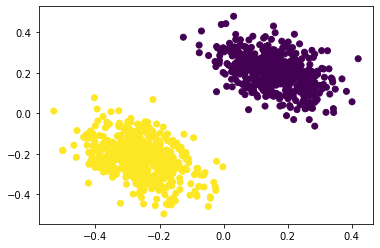

In [30]:
plt.scatter(encoded[:,0], encoded[:,1], c=data[1]);

In 2D we see that the different classes are nicely separated.

In [31]:
encoded.shape

TensorShape([1000, 2])